<h1><center>Práctica 6</center></h1>
<h2><center>Morfología Binaria</center></h2>

In [1]:
#importamos librerías necesarias
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
import RGB2HSI

El objetivo de esta práctica es familiarizar al alumno con las herramientas básicas de análisis de
imagen, en concreto segmentación y morfología matemática para imágenes binarias.
Se trabajará con la imagen ‘Board_Recorte.tif’, imagen true color que acompaña al material de esta
práctica. El objetivo es aplicar herramientas de segmentación (utilizadas en la práctica 4) y
morfología matemática binaria para identificar de forma automática los chips del circuito impreso.

I. Transformación del espacio de representación

Utilice la instrucción imread para leer en MATLAB la imagen ‘Board_Recorte.tif’. Visualice la
imagen en color e identifique manualmente los 7 chips de mayor tamaño. Para seleccionar
manualmente los chips tenga en cuenta que todos deben compartir las mismas (o similares)
características.

<IPython.core.display.Javascript object>


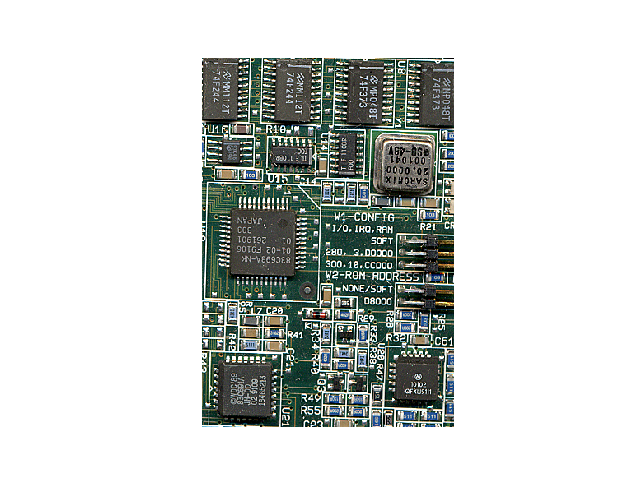

In [2]:
I = cv2.imread('Board_Recorte.tif')
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)


%matplotlib notebook
plt.figure(1)
plt.imshow(I)
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

Visualice cada componente (R, G, B) e indique los comandos MATLAB utilizados. ¿Considera que
alguna de las componentes podría ser más relevante para segmentar la imagen y obtener únicamente
los 7 chips indicados anteriormente? Justifique su respuesta.

<IPython.core.display.Javascript object>


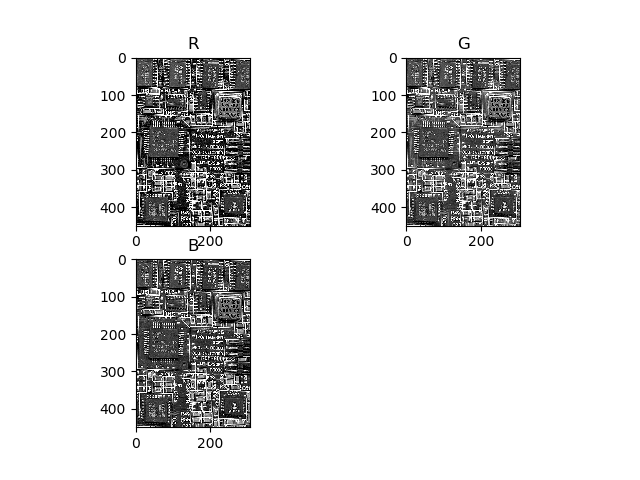

In [3]:
I_R,I_G,I_B = cv2.split(I)

plt.figure('Color components')
plt.subplot(2,2,1)
plt.title('R')
plt.imshow(I_R, cmap = 'gray')

plt.subplot(2,2,2)
plt.title('G')
plt.imshow(I_G, cmap = 'gray')

plt.subplot(2,2,3)
plt.title('B')
plt.imshow(I_B, cmap = 'gray')

plt.show()


Considere la transformación a otro espacio de representación, en concreto el espacio HSI. Utilice
para ello la función rgb2hsi proporcionada como material de la práctica. Utilice la ayuda de
MATLAB para obtener las componentes en el espacio transformado. Visualice cada componente e
indique qué rango de variación tiene cada una de las nuevas componentes. ¿Cómo ha determinado
el rango dinámico?.

<IPython.core.display.Javascript object>


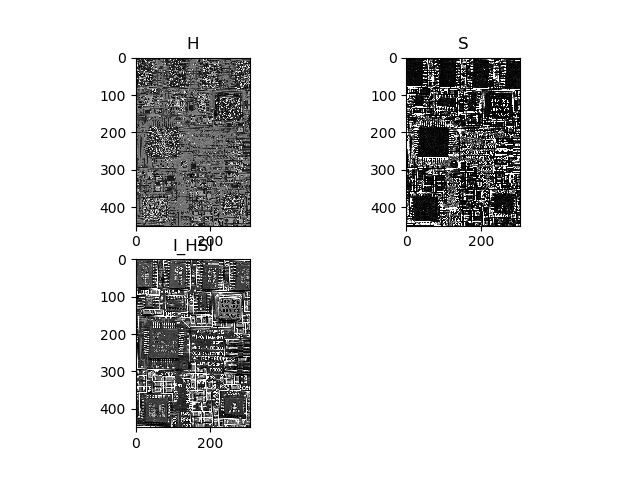

In [7]:
I_func = RGB2HSI.RGB2HSI(I)
I_H,I_S,I_I = cv2.split(I_func)

plt.figure('HSI components using function')
plt.subplot(2,2,1)
plt.title('H')
plt.imshow(I_H, cmap = 'gray')

plt.subplot(2,2,2)
plt.title('S')
plt.imshow(I_S, cmap = 'gray')

plt.subplot(2,2,3)
plt.title('I_HSI')
plt.imshow(I_I, cmap = 'gray')

plt.show()

A partir de la visualización de las componentes de la imagen en el espacio transformado, elija
únicamente una componente (que denotaremos ‘Componente’) para continuar con el proceso de
extracción de los 7 chips de mayor tamaño. Justifique razonadamente su elección.

In [19]:
Component = I_S*255
Component = Component.astype('uint8')
print(Component.dtype)

uint8


II. Umbralización y filtrado
Observe el histograma de ‘Componente’. Puesto que no parece muy clara la elección de un valor
umbral a partir del histograma, utilizaremos la instrucción graythresh para obtener
automáticamente un valor umbral utilizando el método de Otsu. Haga uso de la ayuda de Matlab
para explicar qué criterio sigue el método de Otsu para determinar el umbral. ¿Qué valor umbral se
obtiene? Utilice ese valor umbral para umbralizar la imagen ‘Componente’. 
resultante para que la escala de variación sea [0,255] y convierta la variable resultante a una de tipo
uint8.

<IPython.core.display.Javascript object>


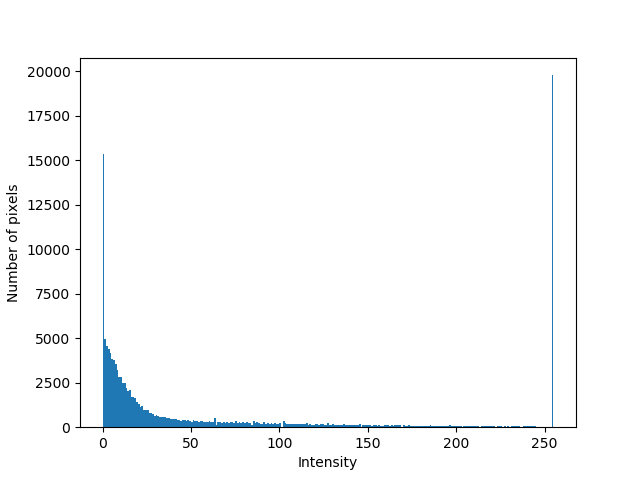

In [20]:
plt.figure('Component')
plt.hist(Component.ravel(),255,[0,255]); 
plt.xlabel('Intensity')
plt.ylabel('Number of pixels')
plt.show()

125.0


<IPython.core.display.Javascript object>


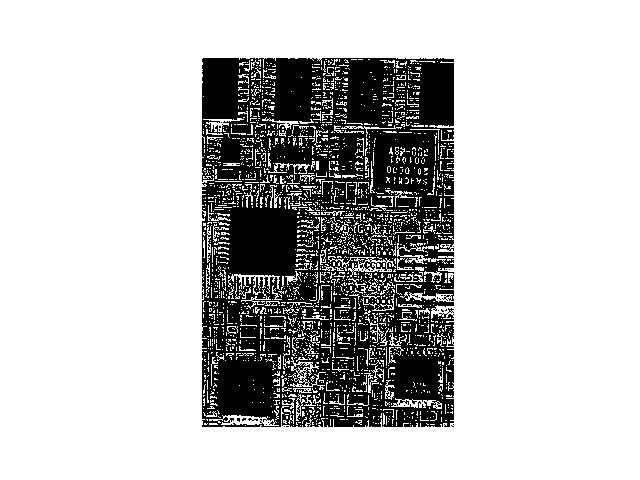

uint8


In [24]:
[thresh, Compthresh] = cv2.threshold(Component, 127, 255, cv2.THRESH_OTSU)
print(thresh)
plt.figure('S thresh')
plt.imshow(Compthresh, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

print(Compthresh.dtype)

Analice con detalle el resultado y justifique qué operador, relacionado con filtrado espacial y
utilizado en prácticas anteriores, se puede aplicar para homogeneizar la región interna de los chips
de modo que la imagen resultante siga siendo una imagen binaria tras la aplicación del filtro.
Aplique el operador considerando una máscara cuadrada de tamaño 5x5. Indique la instrucción
utilizada para realizar el filtrado y visualice la imagen filtrada, comentando las principales
diferencias (relacionadas con las regiones de los objetos de interés) con la imagen sin filtrar.

<IPython.core.display.Javascript object>


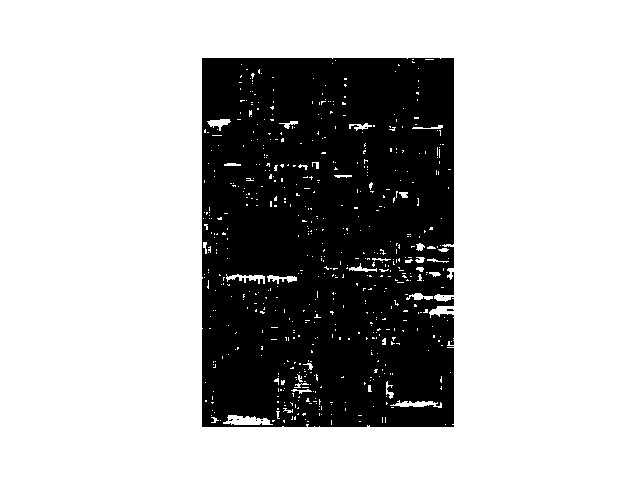

<IPython.core.display.Javascript object>


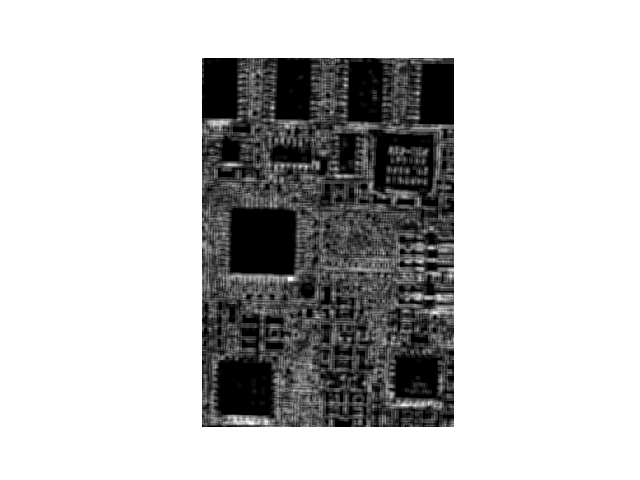

In [26]:
Cmedian = cv2.medianBlur(Compthresh, 5)

plt.figure('with median filter')
plt.imshow(Cmedian, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

kernel = np.ones((5,5),np.float32)/(5*5)
Cmean = cv2.filter2D(Compthresh, -1, kernel, borderType= cv2.BORDER_REFLECT)

plt.figure('with mean filter')
plt.imshow(Cmean, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()